In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'P_50_T_250',
                          'min_5.e-24_max_7.647e-18_ng_8',
                          'wgt_-.2_-.2_-.2_-.2_-.2_-.2_-.2_-.2',
                          'dgs',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'h2o',
                               'band02_wn_340_540',
                               'P_50_T_250',
                               'min_5.e-24_max_7.647e-18_ng_8',
                               'wgt_-.2_-.2_-.2_-.2_-.2_-.2_-.2_-.2',
                               'dgs',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [5]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5, 6, 7, 8]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [6]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [7]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [8]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [9]:
fig.display_hrefanchor()

In [10]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [11]:
table_dgdgs.display_hrefanchor()

In [12]:
for g in [1, 2, 3, 4, 5, 6, 7, 8]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

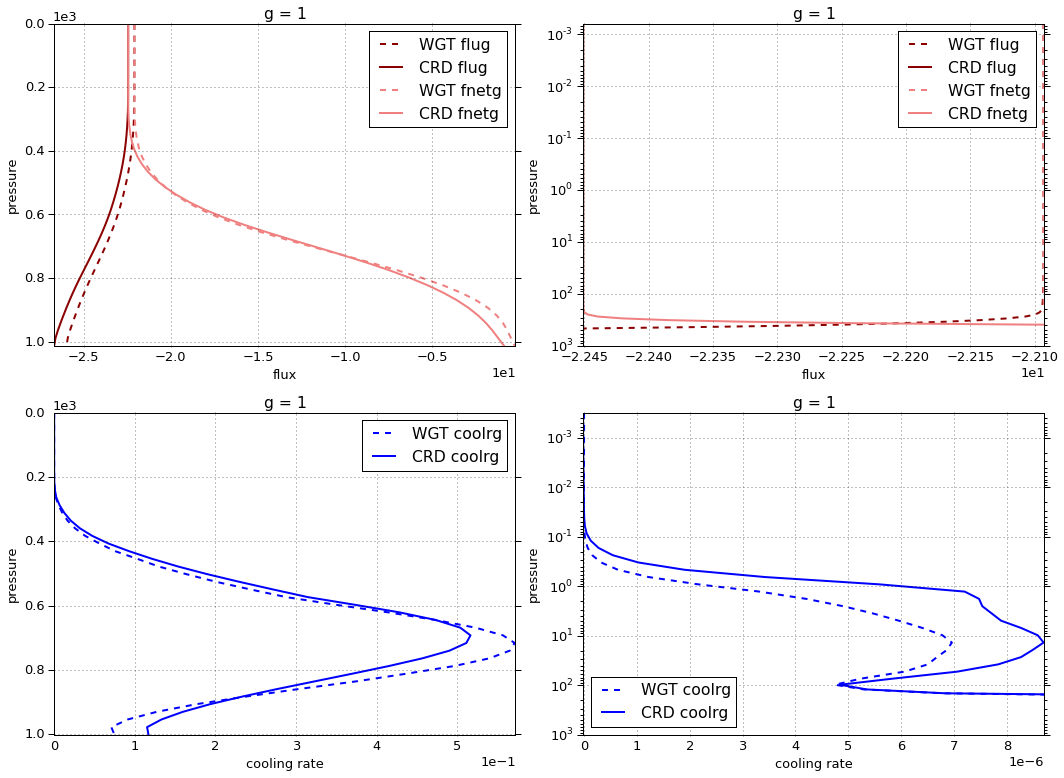

# Figure: flux, cooling rate. g-group 2

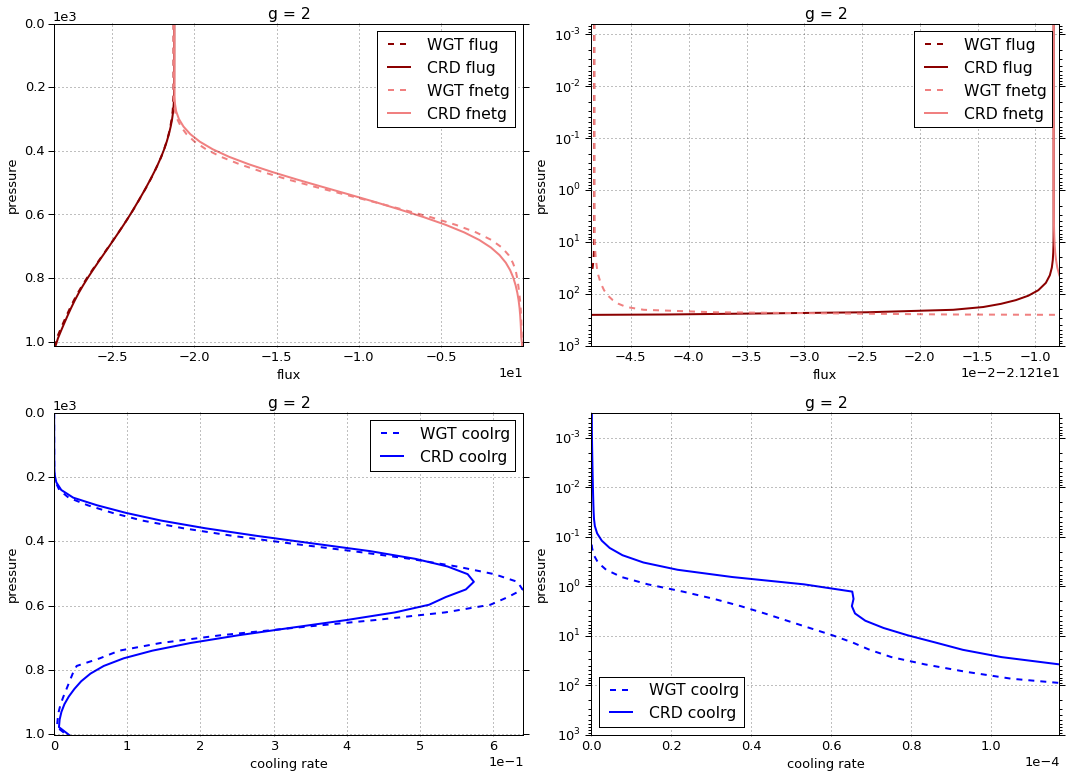

# Figure: flux, cooling rate. g-group 3

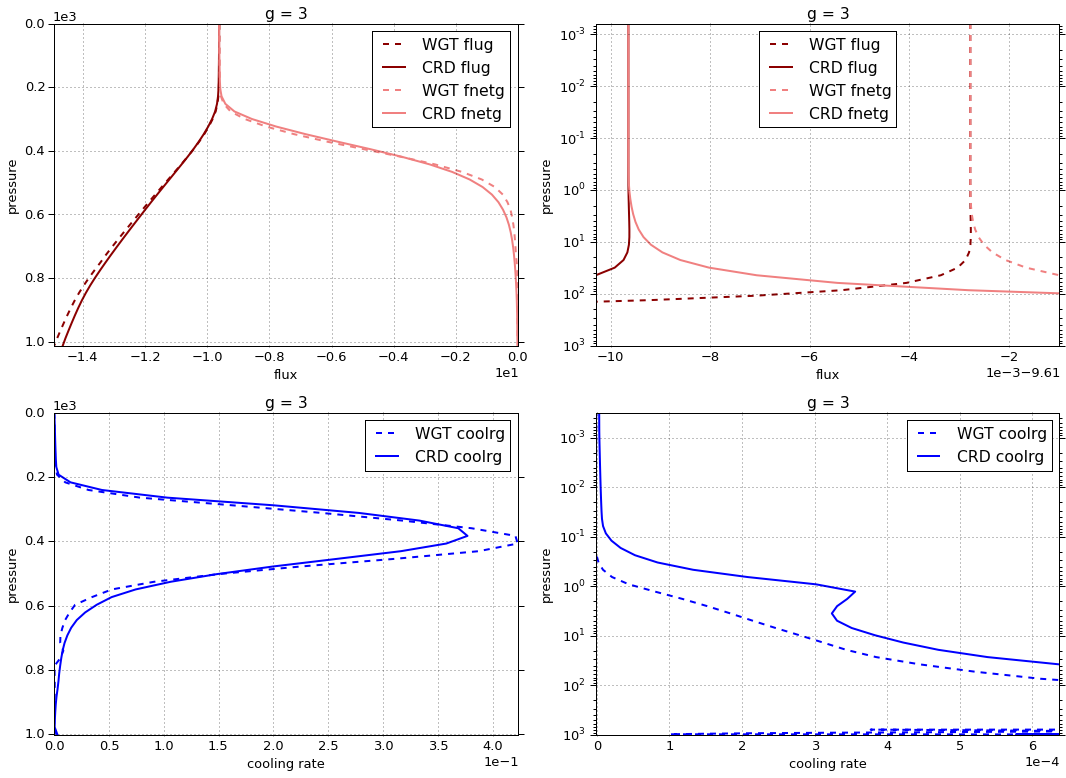

# Figure: flux, cooling rate. g-group 4

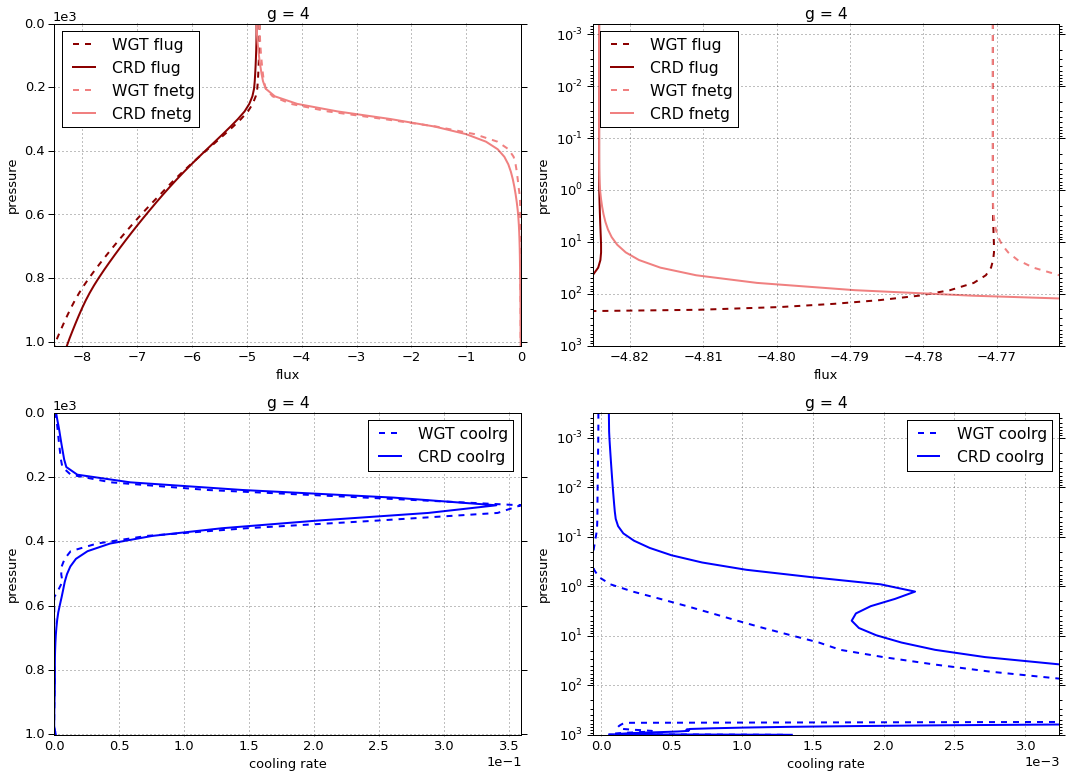

# Figure: flux, cooling rate. g-group 5

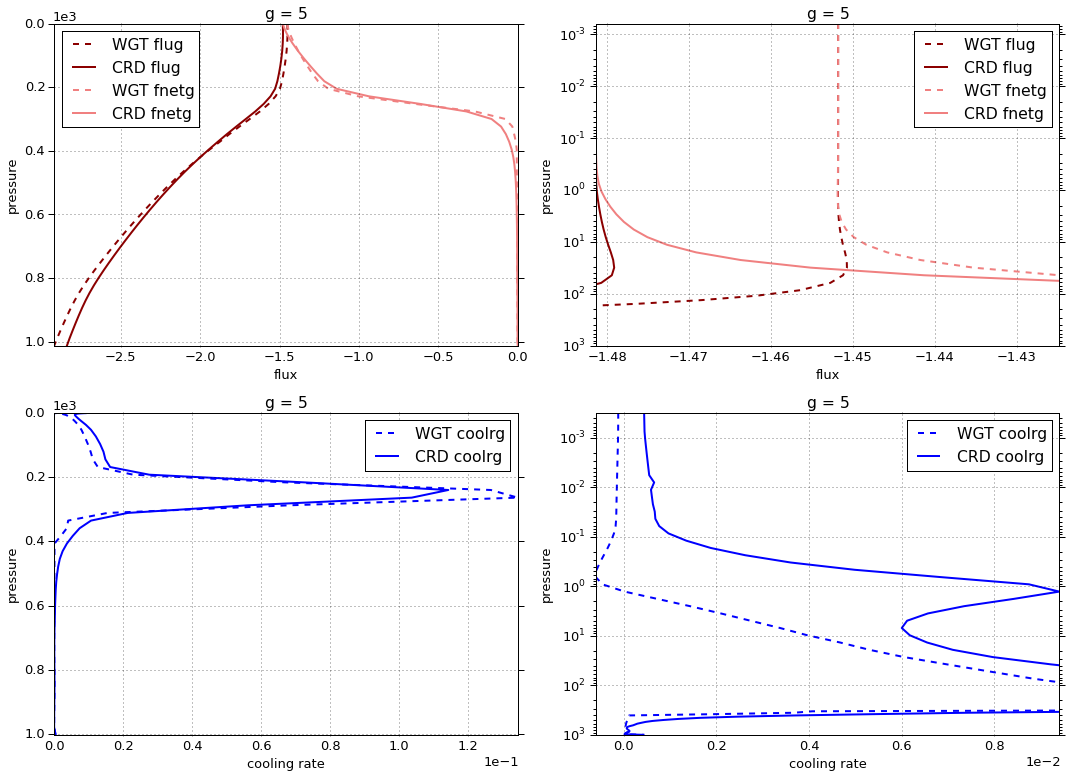

# Figure: flux, cooling rate. g-group 6

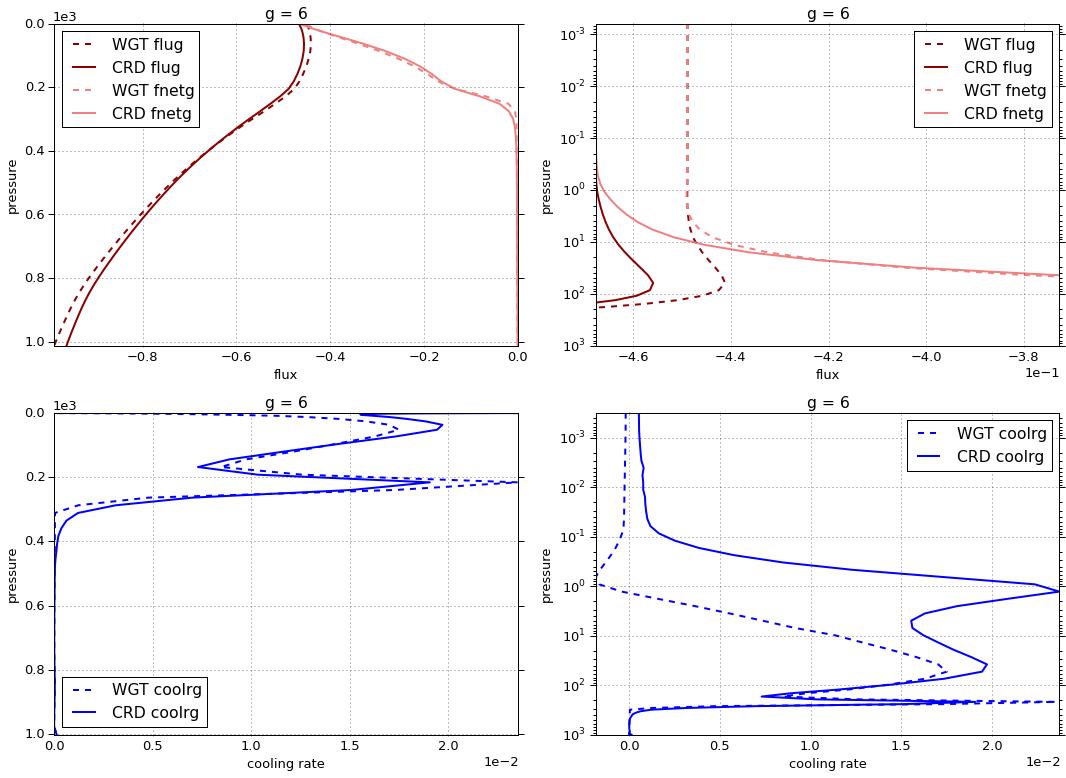

# Figure: flux, cooling rate. g-group 7

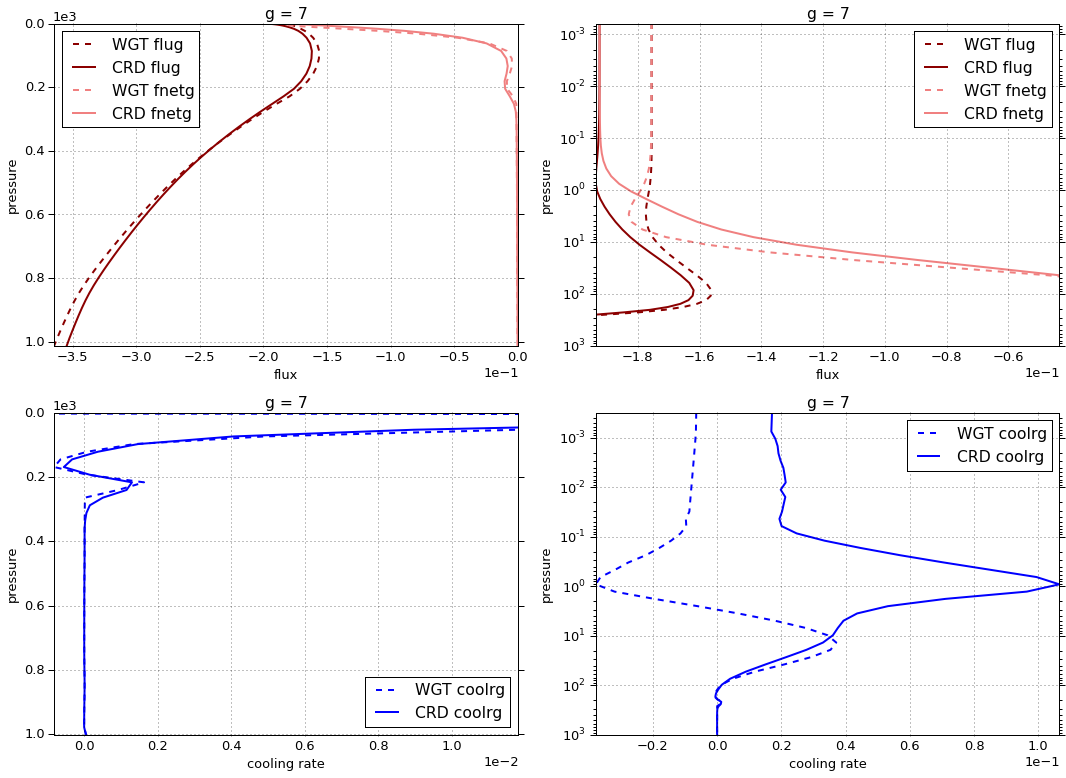

# Figure: flux, cooling rate. g-group 8

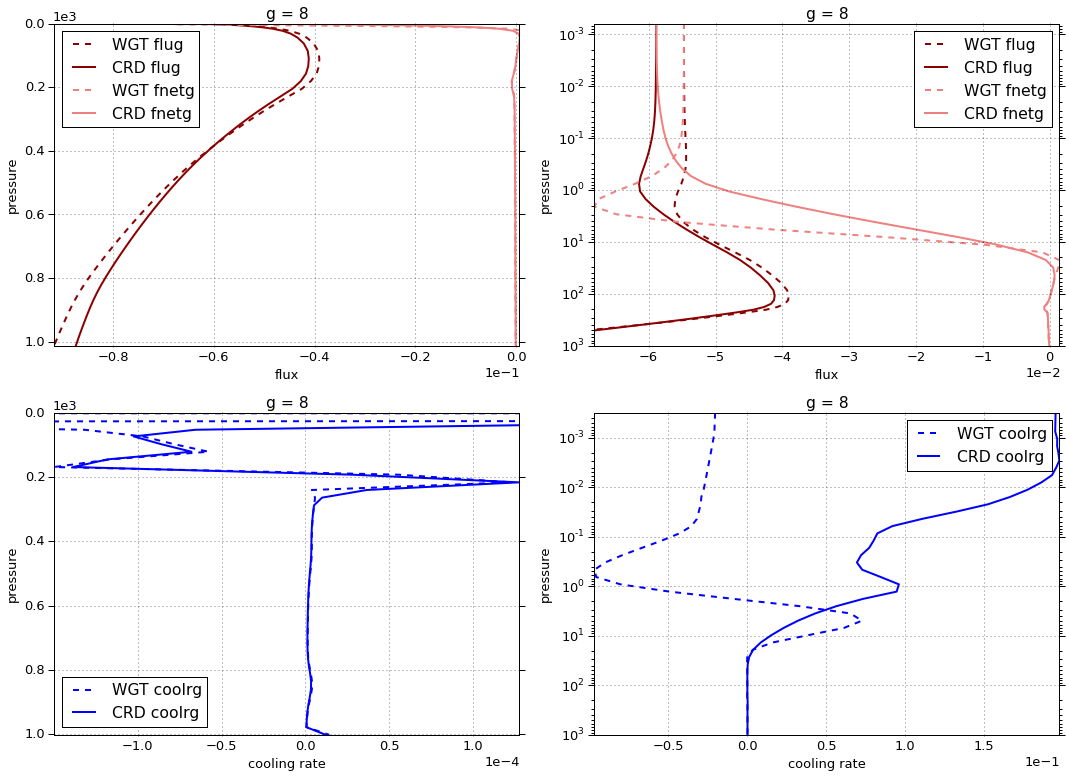

# Figure: flux, cooling rate. g-group total

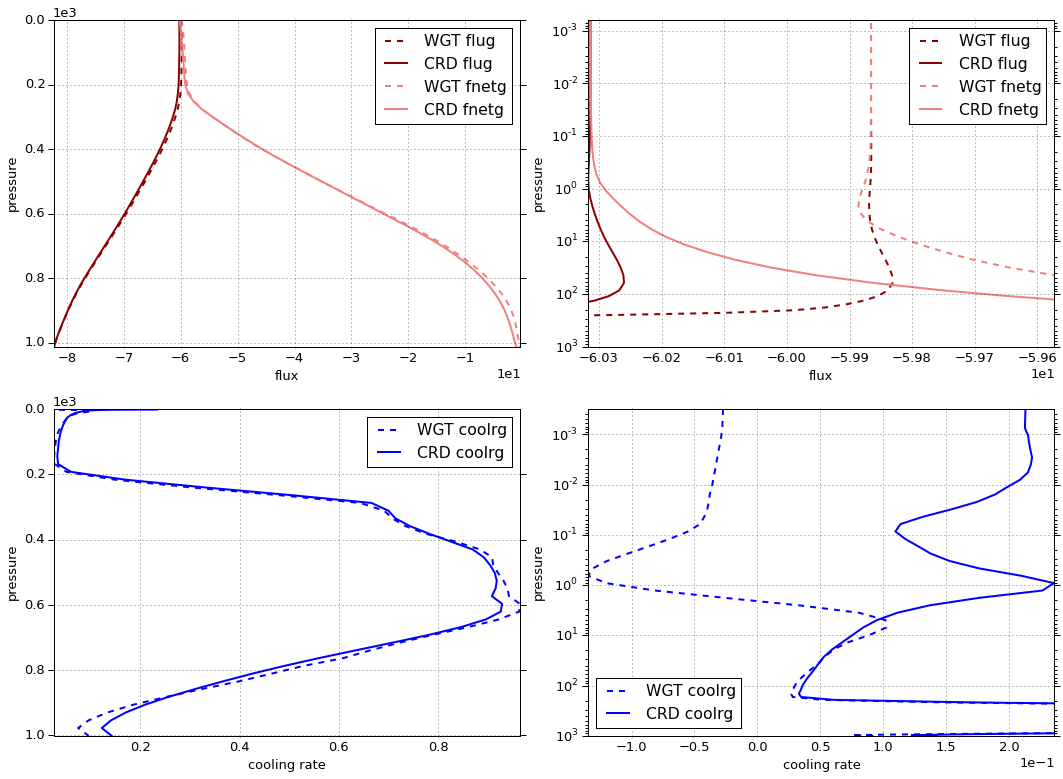

In [13]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [14]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0        1     -22.450929   0.000000 -22.450929
  1013     76    -26.696714  25.805304  -0.891410
2 0        1     -21.218432   0.000000 -21.218432
  1013     76    -28.436066  28.375709  -0.060357
3 0        1      -9.619645   0.000000  -9.619645
  1013     76    -14.656019  14.646782  -0.009238
4 0        1      -4.824173   0.000000  -4.824173
  1013     76     -8.282426   8.278689  -0.003737
5 0        1      -1.481400   0.000000  -1.481400
  1013     76     -2.840067   2.838924  -0.001143
6 0        1      -0.467678   0.000000  -0.467678
  1013     76     -0.962431   0.962045  -0.000386
7 0        1      -0.192423   0.000000  -0.192423
  1013     76     -0.354687   0.354545  -0.000142
8 0        1      -0.058882   0.000000  -0.058882
  1013     76     -0.087420   0.087387  -0.000033


WGT


flug       fldg      fnetg
g pressure level                                 
1 0        1     -22.093159   0.000000 -22.093159
  1013     76    -25.983127  25.703028  -0.280099
2 0        1     -21.258181   0.000000 -21.258181
  1013     76    -28.522226  28.477939  -0.044287
3 0        1      -9.612777   0.000000  -9.612777
  1013     76    -14.930816  14.924436  -0.006381
4 0        1      -4.770550   0.000000  -4.770550
  1013     76     -8.514579   8.510940  -0.003639
5 0        1      -1.451804   0.000000  -1.451804
  1013     76     -2.920128   2.918880  -0.001248
6 0        1      -0.448899   0.000000  -0.448899
  1013     76     -0.988680   0.988257  -0.000423
7 0        1      -0.175573   0.000000  -0.175573
  1013     76     -0.364549   0.364393  -0.000156
8 0        1      -0.054733   0.000000  -0.054733
  1013     76     -0.091725   0.091685  -0.000039


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.357770  0.000000  0.357770
  1013     76     0.713587 -0.102276  0.611311
2 0        1     -0.039749  0.000000 -0.039749
  1013     76    -0.086160  0.102230  0.016070
3 0        1      0.006867  0.000000  0.006867
  1013     76    -0.274797  0.277654  0.002857
4 0        1      0.053623  0.000000  0.053623
  1013     76    -0.232153  0.232251  0.000098
5 0        1      0.029595  0.000000  0.029595
  1013     76    -0.080061  0.079956 -0.000105
6 0        1      0.018779  0.000000  0.018779
  1013     76    -0.026249  0.026213 -0.000036
7 0        1      0.016850  0.000000  0.016850
  1013     76    -0.009862  0.009848 -0.000014
8 0        1      0.004149  0.000000  0.004149
  1013     76    -0.004305  0.004299 -0.000006

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.719567e-08
  1001.112500 75     1.169912e-01
2 0.000312    1      1.086498e-07
  1001.112500 75     2.027322e-02
3 0.000312    1      3.150483e-06
  1001.112500 75     3.152404e-03
4 0.000312    1      5.569167e-05
  1001.112500 75     1.349626e-03
5 0.000312    1      4.427835e-04
  1001.112500 75     4.129299e-04
6 0.000312    1      5.428143e-04
  1001.112500 75     1.395201e-04
7 0.000312    1      1.710506e-02
  1001.112500 75     5.134745e-05
8 0.000312    1      1.950260e-01
  1001.112500 75     1.201875e-05


WGT


coolrg
g pressure    layer              
1 0.000312    1      1.248848e-09
  1001.112500 75     7.483973e-02
2 0.000312    1     -5.831158e-08
  1001.112500 75     1.717513e-02
3 0.000312    1     -8.464306e-07
  1001.112500 75     2.304258e-03
4 0.000312    1     -1.840058e-05
  1001.112500 75     1.314046e-03
5 0.000312    1     -1.156754e-04
  1001.112500 75     4.506604e-04
6 0.000312    1     -1.836753e-04
  1001.112500 75     1.525820e-04
7 0.000312    1     -6.497110e-03
  1001.112500 75     5.626048e-05
8 0.000312    1     -2.049055e-02
  1001.112500 75     1.415577e-05


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      1.844452e-08
  1001.112500 75    -4.215145e-02
2 0.000312    1     -1.669613e-07
  1001.112500 75    -3.098089e-03
3 0.000312    1     -3.996913e-06
  1001.112500 75    -8.481467e-04
4 0.000312    1     -7.409225e-05
  1001.112500 75    -3.558000e-05
5 0.000312    1     -5.584589e-04
  1001.112500 75     3.773048e-05
6 0.000312    1     -7.264896e-04
  1001.112500 75     1.306189e-05
7 0.000312    1     -2.360217e-02
  1001.112500 75     4.913028e-06
8 0.000312    1     -2.155166e-01
  1001.112500 75     2.137017e-06

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-60.31356,0.000000,-60.313560
1013,76,-82.31583,81.349384,-0.966445



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-59.865676,0.000000,-59.865676
1013,76,-82.315829,81.979559,-0.336270



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,4.478842e-01,0.000000,0.447884
1013,76,4.460000e-07,0.630175,0.630175


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.213176
1001.112500,75,0.142382



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.027306
1001.112500,75,0.096307



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.240482
1001.112500,75,-0.046075


In [15]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.308150,0.315652
2,0.345775,0.346497
3,0.185100,0.181385
4,0.106400,0.103438
5,0.036500,0.035475
6,0.012350,0.012011
7,0.004550,0.004429
8,0.001175,0.001114


In [16]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

wgt                                           crd        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -22.093159  0.000000e+00 -22.093159   1     1   
0.000624      1     2 -22.093159 -1.193191e-12 -22.093159   1     2   
0.000876      1     3 -22.093159 -1.670907e-12 -22.093159   1     3   
0.001229      1     4 -22.093159 -2.350093e-12 -22.093159   1     4   
0.001723      1     5 -22.093159 -3.311325e-12 -22.093159   1     5   
0.002417      1     6 -22.093159 -4.671520e-12 -22.093159   1     6   
0.003391      1     7 -22.093159 -6.568752e-12 -22.093159   1     7   
0.004757      1     8 -22.093159 -9.189633e-12 -22.093159   1     8   
0.006672      1     9 -22.093159 -1.273845e-11 -22.093159   1     9   
0.009359      1    10 -22.093159 -1.741916e-11 -22.093159   1    10   
0.013128      1    11 -22.093159 -2.329354e-11 -22.093159   1    11   
0.018415      1    12 -22.093159 -3.003324e-11 -22.093159   1    12   
0.025830      1    13 -22.093159 -3.632300e-11 -22.093159   1    13   
0.036232      1    14 -22.093159 -3.859493e-11 -22.093159   1    14   
0.050823      1    15 -22.093159 -2.831797e-11 -22.093159   1    15   
0.071291      1    16 -22.093159  1.408118e-11 -22.093159   1    16   
0.100000      1    17 -22.093159  1.382649e-10 -22.093159   1    17   
0.140271      1    18 -22.093159  4.754753e-10 -22.093159   1    18   
0.196760      1    19 -22.093159  1.355800e-09 -22.093159   1    19   
0.275997      1    20 -22.093159  3.590770e-09 -22.093159   1    20   
0.387100      1    21 -22.093159  9.161362e-09 -22.093159   1    21   
0.543100      1    22 -22.093159  2.290366e-08 -22.093159   1    22   
0.761700      1    23 -22.093159  5.632477e-08 -22.093159   1    23   
1.068500      1    24 -22.093159  1.346087e-07 -22.093159   1    24   
1.498800      1    25 -22.093159  3.006542e-07 -22.093159   1    25   
2.102400      1    26 -22.093159  6.080586e-07 -22.093159   1    26   
2.949000      1    27 -22.093159  1.144199e-06 -22.093158   1    27   
4.136600      1    28 -22.093160  2.057099e-06 -22.093158   1    28   
5.802500      1    29 -22.093160  3.600131e-06 -22.093156   1    29   
8.139200      1    30 -22.093161  6.216798e-06 -22.093155   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -22.141865  1.013528e-01 -22.040512   1    47   
347.300000    1    48 -22.169215  1.753281e-01 -21.993887   1    48   
371.075000    1    49 -22.204270  2.831893e-01 -21.921081   1    49   
394.850000    1    50 -22.248257  4.356741e-01 -21.812582   1    50   
418.625000    1    51 -22.302112  6.478254e-01 -21.654287   1    51   
442.400000    1    52 -22.366973  9.258458e-01 -21.441127   1    52   
466.175000    1    53 -22.441458  1.290892e+00 -21.150566   1    53   
489.950000    1    54 -22.526358  1.740715e+00 -20.785643   1    54   
513.725000    1    55 -22.620497  2.296435e+00 -20.324062   1    55   
537.500000    1    56 -22.724690  2.966306e+00 -19.758383   1    56   
561.275000    1    57 -22.837807  3.765204e+00 -19.072603   1    57   
585.050000    1    58 -22.959372  4.697208e+00 -18.262164   1    58   
608.825000    1    59 -23.097604  5.818752e+00 -17.278853   1    59   
632.600000    1    60 -23.249361  7.138084e+00 -16.111278   1    60   
656.375000    1    61 -23.415385  8.637180e+00 -14.778205   1    61   
680.150000    1    62 -23.593634  1.028729e+01 -13.306342   1    62   
703.925000    1    63 -23.782269  1.204346e+01 -11.738811   1    63   
727.700000    1    64 -23.979130  1.384874e+01 -10.130388   1    64   
751.475000    1    65 -24.181805  1.564270e+01  -8.539109   1    65   
775.250000    1    66 -24.386256  1.736778e+01  -7.018476   1    66   
799.025000    1    67 -24.589398  1.896987e+01  -5.619529   1    67   
822.800000    1    68 -24.786572  2.039971e+01  -4.386865   1    68   
846.575000    1    69 -24.974914  2.

In [17]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

wgt                                           crd        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      2     1 -21.258181  0.000000e+00 -21.258181   2     1   
0.000624      2     2 -21.258181 -2.617119e-11 -21.258181   2     2   
0.000876      2     3 -21.258181 -3.677791e-11 -21.258181   2     3   
0.001229      2     4 -21.258181 -5.189899e-11 -21.258181   2     4   
0.001723      2     5 -21.258181 -7.349454e-11 -21.258181   2     5   
0.002417      2     6 -21.258181 -1.042917e-10 -21.258181   2     6   
0.003391      2     7 -21.258181 -1.481009e-10 -21.258181   2     7   
0.004757      2     8 -21.258181 -2.102198e-10 -21.258181   2     8   
0.006672      2     9 -21.258181 -2.978724e-10 -21.258181   2     9   
0.009359      2    10 -21.258181 -4.207014e-10 -21.258181   2    10   
0.013128      2    11 -21.258181 -5.910895e-10 -21.258181   2    11   
0.018415      2    12 -21.258181 -8.239237e-10 -21.258181   2    12   
0.025830      2    13 -21.258181 -1.134774e-09 -21.258181   2    13   
0.036232      2    14 -21.258181 -1.534513e-09 -21.258181   2    14   
0.050823      2    15 -21.258181 -2.018066e-09 -21.258181   2    15   
0.071291      2    16 -21.258181 -2.562971e-09 -21.258181   2    16   
0.100000      2    17 -21.258181 -3.104654e-09 -21.258181   2    17   
0.140271      2    18 -21.258181 -3.286714e-09 -21.258181   2    18   
0.196760      2    19 -21.258181 -1.764511e-09 -21.258181   2    19   
0.275997      2    20 -21.258181  5.401527e-09 -21.258181   2    20   
0.387100      2    21 -21.258181  2.888966e-08 -21.258181   2    21   
0.543100      2    22 -21.258181  9.658015e-08 -21.258181   2    22   
0.761700      2    23 -21.258181  2.779241e-07 -21.258180   2    23   
1.068500      2    24 -21.258181  7.325685e-07 -21.258180   2    24   
1.498800      2    25 -21.258180  1.754580e-06 -21.258179   2    25   
2.102400      2    26 -21.258180  3.735546e-06 -21.258176   2    26   
2.949000      2    27 -21.258180  7.296172e-06 -21.258173   2    27   
4.136600      2    28 -21.258180  1.347006e-05 -21.258167   2    28   
5.802500      2    29 -21.258181  2.400547e-05 -21.258157   2    29   
8.139200      2    30 -21.258184  4.193117e-05 -21.258142   2    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    2    47 -21.457973  6.415648e-01 -20.816408   2    47   
347.300000    2    48 -21.560362  1.083735e+00 -20.476627   2    48   
371.075000    2    49 -21.686026  1.706309e+00 -19.979717   2    49   
394.850000    2    50 -21.837277  2.544946e+00 -19.292331   2    50   
418.625000    2    51 -22.011563  3.631755e+00 -18.379808   2    51   
442.400000    2    52 -22.210586  4.981656e+00 -17.228929   2    52   
466.175000    2    53 -22.428558  6.569584e+00 -15.858974   2    53   
489.950000    2    54 -22.662390  8.352978e+00 -14.309413   2    54   
513.725000    2    55 -22.909729  1.029348e+01 -12.616253   2    55   
537.500000    2    56 -23.168924  1.233505e+01 -10.833877   2    56   
561.275000    2    57 -23.437252  1.440575e+01  -9.031501   2    57   
585.050000    2    58 -23.710396  1.642496e+01  -7.285433   2    58   
608.825000    2    59 -23.998027  1.839118e+01  -5.606846   2    59   
632.600000    2    60 -24.298135  2.019609e+01  -4.102041   2    60   
656.375000    2    61 -24.608551  2.174194e+01  -2.866606   2    61   
680.150000    2    62 -24.925458  2.298826e+01  -1.937202   2    62   
703.925000    2    63 -25.246666  2.394755e+01  -1.299116   2    63   
727.700000    2    64 -25.569726  2.468031e+01  -0.889414   2    64   
751.475000    2    65 -25.891023  2.525269e+01  -0.638329   2    65   
775.250000    2    66 -26.209512  2.574740e+01  -0.462114   2    66   
799.025000    2    67 -26.517659  2.614244e+01  -0.375220   2    67   
822.800000    2    68 -26.809726  2.650611e+01  -0.303617   2    68   
846.575000    2    69 -27.080798  2.

In [18]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

wgt                                          crd                   \
              g level       flug          fldg     fnetg   g level       flug   
pressure                                                                        
0.000000      3     1  -9.612777  0.000000e+00 -9.612777   3     1  -9.619645   
0.000624      3     2  -9.612777 -1.527464e-10 -9.612777   3     2  -9.619645   
0.000876      3     3  -9.612777 -2.147914e-10 -9.612777   3     3  -9.619645   
0.001229      3     4  -9.612777 -3.034739e-10 -9.612777   3     4  -9.619645   
0.001723      3     5  -9.612777 -4.305544e-10 -9.612777   3     5  -9.619645   
0.002417      3     6  -9.612777 -6.124514e-10 -9.612777   3     6  -9.619645   
0.003391      3     7  -9.612777 -8.724440e-10 -9.612777   3     7  -9.619645   
0.004757      3     8  -9.612777 -1.243278e-09 -9.612777   3     8  -9.619645   
0.006672      3     9  -9.612777 -1.770587e-09 -9.612777   3     9  -9.619645   
0.009359      3    10  -9.612777 -2.517206e-09 -9.612777   3    10  -9.619645   
0.013128      3    11  -9.612777 -3.567873e-09 -9.612777   3    11  -9.619645   
0.018415      3    12  -9.612777 -5.033356e-09 -9.612777   3    12  -9.619645   
0.025830      3    13  -9.612777 -7.050795e-09 -9.612777   3    13  -9.619645   
0.036232      3    14  -9.612777 -9.773711e-09 -9.612777   3    14  -9.619645   
0.050823      3    15  -9.612777 -1.335241e-08 -9.612777   3    15  -9.619645   
0.071291      3    16  -9.612777 -1.808187e-08 -9.612777   3    16  -9.619645   
0.100000      3    17  -9.612777 -2.473857e-08 -9.612777   3    17  -9.619645   
0.140271      3    18  -9.612777 -3.410329e-08 -9.612777   3    18  -9.619645   
0.196760      3    19  -9.612777 -4.490629e-08 -9.612777   3    19  -9.619645   
0.275997      3    20  -9.612777 -4.954995e-08 -9.612777   3    20  -9.619645   
0.387100      3    21  -9.612777 -2.200039e-08 -9.612777   3    21  -9.619645   
0.543100      3    22  -9.612777  1.141741e-07 -9.612777   3    22  -9.619645   
0.761700      3    23  -9.612777  5.636266e-07 -9.612777   3    23  -9.619644   
1.068500      3    24  -9.612777  1.846916e-06 -9.612775   3    24  -9.619642   
1.498800      3    25  -9.612776  5.095516e-06 -9.612771   3    25  -9.619639   
2.102400      3    26  -9.612774  1.195734e-05 -9.612762   3    26  -9.619636   
2.949000      3    27  -9.612772  2.490349e-05 -9.612747   3    27  -9.619631   
4.136600      3    28  -9.612769  4.795798e-05 -9.612721   3    28  -9.619627   
5.802500      3    29  -9.612767  8.785374e-05 -9.612679   3    29  -9.619624   
8.139200      3    30  -9.612767  1.561395e-04 -9.612611   3    30  -9.619625   
...          ..   ...        ...           ...       ...  ..   ...        ...   
323.525000    3    47  -9.952067  1.845977e+00 -8.106090   3    47  -9.970822   
347.300000    3    48 -10.097385  2.885988e+00 -7.211397   3    48 -10.114310   
371.075000    3    49 -10.261936  4.123036e+00 -6.138900   3    49 -10.274488   
394.850000    3    50 -10.440814  5.487074e+00 -4.953741   3    50 -10.448600   
418.625000    3    51 -10.636204  6.873467e+00 -3.762737   3    51 -10.633676   
442.400000    3    52 -10.840241  8.168257e+00 -2.671984   3    52 -10.827427   
466.175000    3    53 -11.049070  9.252377e+00 -1.796693   3    53 -11.024558   
489.950000    3    54 -11.258982  1.009606e+01 -1.162924   3    54 -11.222229   
513.725000    3    55 -11.469180  1.072793e+01 -0.741248   3    55 -11.419539   
537.500000    3    56 -11.678511  1.119393e+01 -0.484581   3    56 -11.615827   
561.275000    3    57 -11.886307  1.155007e+01 -0.336232   3    57 -11.810275   
585.050000    3    58 -12.089498  1.185077e+01 -0.238726   3    58 -12.000444   
608.825000    3    59 -12.291899  1.210739e+01 -0.184511   3    59 -12.189751   
632.600000    3    60 -12.492757  1.234814e+01 -0.144614   3    60 -12.377779   
656.375000    3    61 -12.692150  1.257609e+01 -0.116057   3    61 -12.563835   
680.150000    3    62 -12.888668  1.279414e

In [19]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -4.770550  0.000000e+00 -4.770550   4     1 -4.824173   
0.000624      4     2 -4.770550 -2.219751e-09 -4.770550   4     2 -4.824173   
0.000876      4     3 -4.770550 -3.121007e-09 -4.770550   4     3 -4.824173   
0.001229      4     4 -4.770550 -4.403313e-09 -4.770550   4     4 -4.824173   
0.001723      4     5 -4.770550 -6.232367e-09 -4.770550   4     5 -4.824173   
0.002417      4     6 -4.770550 -8.840462e-09 -4.770550   4     6 -4.824173   
0.003391      4     7 -4.770550 -1.255796e-08 -4.770550   4     7 -4.824173   
0.004757      4     8 -4.770550 -1.785317e-08 -4.770550   4     8 -4.824173   
0.006672      4     9 -4.770550 -2.538776e-08 -4.770550   4     9 -4.824173   
0.009359      4    10 -4.770550 -3.609424e-08 -4.770550   4    10 -4.824173   
0.013128      4    11 -4.770550 -5.127804e-08 -4.770550   4    11 -4.824173   
0.018415      4    12 -4.770550 -7.275254e-08 -4.770550   4    12 -4.824173   
0.025830      4    13 -4.770550 -1.030051e-07 -4.770550   4    13 -4.824173   
0.036232      4    14 -4.770550 -1.453906e-07 -4.770550   4    14 -4.824173   
0.050823      4    15 -4.770550 -2.045486e-07 -4.770550   4    15 -4.824173   
0.071291      4    16 -4.770550 -2.892732e-07 -4.770550   4    16 -4.824173   
0.100000      4    17 -4.770550 -4.190651e-07 -4.770550   4    17 -4.824174   
0.140271      4    18 -4.770549 -6.260194e-07 -4.770550   4    18 -4.824174   
0.196760      4    19 -4.770550 -9.496712e-07 -4.770550   4    19 -4.824174   
0.275997      4    20 -4.770550 -1.431540e-06 -4.770551   4    20 -4.824175   
0.387100      4    21 -4.770550 -2.086029e-06 -4.770552   4    21 -4.824174   
0.543100      4    22 -4.770550 -2.807686e-06 -4.770553   4    22 -4.824172   
0.761700      4    23 -4.770550 -3.105786e-06 -4.770553   4    23 -4.824165   
1.068500      4    24 -4.770549 -1.299069e-06 -4.770551   4    24 -4.824151   
1.498800      4    25 -4.770546  7.208670e-06 -4.770539   4    25 -4.824128   
2.102400      4    26 -4.770539  2.982551e-05 -4.770509   4    26 -4.824098   
2.949000      4    27 -4.770525  7.730608e-05 -4.770448   4    27 -4.824065   
4.136600      4    28 -4.770504  1.670398e-04 -4.770337   4    28 -4.824027   
5.802500      4    29 -4.770475  3.281283e-04 -4.770147   4    29 -4.823986   
8.139200      4    30 -4.770440  6.103886e-04 -4.769829   4    30 -4.823944   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -5.250119  3.703084e+00 -1.547034   4    47 -5.297699   
347.300000    4    48 -5.401640  4.555390e+00 -0.846250   4    48 -5.439085   
371.075000    4    49 -5.557231  5.127784e+00 -0.429447   4    49 -5.583538   
394.850000    4    50 -5.714494  5.486245e+00 -0.228248   4    50 -5.728474   
418.625000    4    51 -5.870381  5.735235e+00 -0.135146   4    51 -5.871818   
442.400000    4    52 -6.023792  5.924601e+00 -0.099191   4    52 -6.012484   
466.175000    4    53 -6.172790  6.096524e+00 -0.076266   4    53 -6.148814   
489.950000    4    54 -6.316596  6.256755e+00 -0.059841   4    54 -6.280341   
513.725000    4    55 -6.452461  6.408149e+00 -0.044312   4    55 -6.407390   
537.500000    4    56 -6.581937  6.555726e+00 -0.026211   4    56 -6.529934   
561.275000    4    57 -6.716080  6.699655e+00 -0.016424   4    57 -6.648705   
585.050000    4    58 -6.846189  6.830243e+00 -0.015946   4    58 -6.764621   
608.825000    4    59 -6.972656  6.957146e+00 -0.015509   4    59 -6.878570   
632.600000    4    60 -7.095769  7.080663e+00 -0.015106   4    60 -6.990203   
656.375000    4    61 -7.215757  7.201028e+00 -0.014729   4    61 -7.099243   
680.150000    4    62 -7.332812  7.318439e+00 -0.014373   4    62 -7.205803   
703.925000    4    63 -7.447079  7.433048e+00 -0.014031   4   

In [20]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      5     1 -1.451804  0.000000e+00 -1.451804   5     1 -1.481400   
0.000624      5     2 -1.451804 -1.128500e-08 -1.451804   5     2 -1.481400   
0.000876      5     3 -1.451804 -1.586875e-08 -1.451804   5     3 -1.481400   
0.001229      5     4 -1.451804 -2.239675e-08 -1.451805   5     4 -1.481400   
0.001723      5     5 -1.451804 -3.171898e-08 -1.451805   5     5 -1.481400   
0.002417      5     6 -1.451804 -4.502756e-08 -1.451805   5     6 -1.481400   
0.003391      5     7 -1.451804 -6.402334e-08 -1.451805   5     7 -1.481400   
0.004757      5     8 -1.451804 -9.112560e-08 -1.451805   5     8 -1.481400   
0.006672      5     9 -1.451804 -1.297678e-07 -1.451805   5     9 -1.481400   
0.009359      5    10 -1.451804 -1.848183e-07 -1.451805   5    10 -1.481400   
0.013128      5    11 -1.451804 -2.631505e-07 -1.451805   5    11 -1.481400   
0.018415      5    12 -1.451804 -3.744276e-07 -1.451805   5    12 -1.481400   
0.025830      5    13 -1.451804 -5.321375e-07 -1.451805   5    13 -1.481401   
0.036232      5    14 -1.451804 -7.549506e-07 -1.451805   5    14 -1.481401   
0.050823      5    15 -1.451804 -1.069653e-06 -1.451806   5    15 -1.481402   
0.071291      5    16 -1.451804 -1.528972e-06 -1.451806   5    16 -1.481402   
0.100000      5    17 -1.451804 -2.255181e-06 -1.451807   5    17 -1.481403   
0.140271      5    18 -1.451804 -3.468252e-06 -1.451808   5    18 -1.481404   
0.196760      5    19 -1.451805 -5.493492e-06 -1.451810   5    19 -1.481405   
0.275997      5    20 -1.451805 -8.817293e-06 -1.451814   5    20 -1.481404   
0.387100      5    21 -1.451807 -1.412084e-05 -1.451821   5    21 -1.481399   
0.543100      5    22 -1.451809 -2.221390e-05 -1.451832   5    22 -1.481384   
0.761700      5    23 -1.451814 -3.350256e-05 -1.451847   5    23 -1.481349   
1.068500      5    24 -1.451818 -4.529978e-05 -1.451864   5    24 -1.481275   
1.498800      5    25 -1.451818 -4.448686e-05 -1.451863   5    25 -1.481158   
2.102400      5    26 -1.451804 -7.275758e-06 -1.451811   5    26 -1.481015   
2.949000      5    27 -1.451766  9.842955e-05 -1.451667   5    27 -1.480850   
4.136600      5    28 -1.451695  3.229107e-04 -1.451372   5    28 -1.480662   
5.802500      5    29 -1.451581  7.489255e-04 -1.450832   5    29 -1.480444   
8.139200      5    30 -1.451414  1.515938e-03 -1.449898   5    30 -1.480188   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    5    47 -1.753711  1.718746e+00 -0.034965   5    47 -1.773428   
347.300000    5    48 -1.816818  1.793331e+00 -0.023487   5    48 -1.832257   
371.075000    5    49 -1.876471  1.863320e+00 -0.013151   5    49 -1.888972   
394.850000    5    50 -1.938613  1.931050e+00 -0.007563   5    50 -1.944238   
418.625000    5    51 -1.998042  1.990816e+00 -0.007226   5    51 -1.997785   
442.400000    5    52 -2.054746  2.047856e+00 -0.006890   5    52 -2.049296   
466.175000    5    53 -2.108779  2.102210e+00 -0.006569   5    53 -2.098501   
489.950000    5    54 -2.160339  2.154059e+00 -0.006279   5    54 -2.145481   
513.725000    5    55 -2.209742  2.203712e+00 -0.006030   5    55 -2.190581   
537.500000    5    56 -2.257316  2.251499e+00 -0.005817   5    56 -2.234074   
561.275000    5    57 -2.303321  2.297689e+00 -0.005633   5    57 -2.276133   
585.050000    5    58 -2.347943  2.342475e+00 -0.005469   5    58 -2.316927   
608.825000    5    59 -2.391316  2.385997e+00 -0.005319   5    59 -2.356632   
632.600000    5    60 -2.433538  2.428358e+00 -0.005181   5    60 -2.395223   
656.375000    5    61 -2.474689  2.469638e+00 -0.005051   5    61 -2.432896   
680.150000    5    62 -2.514834  2.509904e+00 -0.004929   5    62 -2.469684   
703.925000    5    63 -2.554022  2.549210e+00 -0.004812   5   

In [21]:
g = 6

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 6

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      6     1 -0.448899  0.000000e+00 -0.448899   6     1 -0.467678   
0.000624      6     2 -0.448899 -1.731406e-08 -0.448899   6     2 -0.467678   
0.000876      6     3 -0.448899 -2.437589e-08 -0.448899   6     3 -0.467678   
0.001229      6     4 -0.448899 -3.450115e-08 -0.448899   6     4 -0.467678   
0.001723      6     5 -0.448899 -4.907973e-08 -0.448899   6     5 -0.467678   
0.002417      6     6 -0.448899 -7.006147e-08 -0.448899   6     6 -0.467678   
0.003391      6     7 -0.448899 -1.002473e-07 -0.448899   6     7 -0.467678   
0.004757      6     8 -0.448899 -1.436468e-07 -0.448899   6     8 -0.467678   
0.006672      6     9 -0.448899 -2.059833e-07 -0.448899   6     9 -0.467678   
0.009359      6    10 -0.448899 -2.954107e-07 -0.448899   6    10 -0.467679   
0.013128      6    11 -0.448899 -4.234800e-07 -0.448899   6    11 -0.467679   
0.018415      6    12 -0.448899 -6.064542e-07 -0.448899   6    12 -0.467679   
0.025830      6    13 -0.448899 -8.670048e-07 -0.448900   6    13 -0.467680   
0.036232      6    14 -0.448899 -1.236342e-06 -0.448900   6    14 -0.467681   
0.050823      6    15 -0.448899 -1.759008e-06 -0.448901   6    15 -0.467682   
0.071291      6    16 -0.448899 -2.535111e-06 -0.448901   6    16 -0.467684   
0.100000      6    17 -0.448899 -3.837696e-06 -0.448903   6    17 -0.467686   
0.140271      6    18 -0.448899 -6.207624e-06 -0.448905   6    18 -0.467690   
0.196760      6    19 -0.448900 -1.050886e-05 -0.448910   6    19 -0.467693   
0.275997      6    20 -0.448901 -1.816165e-05 -0.448919   6    20 -0.467695   
0.387100      6    21 -0.448905 -3.139697e-05 -0.448936   6    21 -0.467690   
0.543100      6    22 -0.448913 -5.340511e-05 -0.448966   6    22 -0.467663   
0.761700      6    23 -0.448926 -8.748863e-05 -0.449013   6    23 -0.467586   
1.068500      6    24 -0.448944 -1.295097e-04 -0.449073   6    24 -0.467409   
1.498800      6    25 -0.448950 -1.438360e-04 -0.449094   6    25 -0.467108   
2.102400      6    26 -0.448916 -6.214846e-05 -0.448979   6    26 -0.466722   
2.949000      6    27 -0.448818  2.037875e-04 -0.448614   6    27 -0.466256   
4.136600      6    28 -0.448624  7.894542e-04 -0.447835   6    28 -0.465694   
5.802500      6    29 -0.448297  1.915724e-03 -0.446381   6    29 -0.465002   
8.139200      6    30 -0.447798  3.949901e-03 -0.443848   6    30 -0.464132   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    6    47 -0.590402  5.874803e-01 -0.002922   6    47 -0.595020   
347.300000    6    48 -0.613354  6.105593e-01 -0.002794   6    48 -0.616196   
371.075000    6    49 -0.635325  6.326490e-01 -0.002676   6    49 -0.636568   
394.850000    6    50 -0.656364  6.538036e-01 -0.002561   6    50 -0.656082   
418.625000    6    51 -0.676486  6.740390e-01 -0.002447   6    51 -0.674725   
442.400000    6    52 -0.695684  6.933511e-01 -0.002333   6    52 -0.692519   
466.175000    6    53 -0.713978  7.117539e-01 -0.002224   6    53 -0.709509   
489.950000    6    54 -0.731435  7.293088e-01 -0.002126   6    54 -0.725698   
513.725000    6    55 -0.748162  7.461201e-01 -0.002042   6    55 -0.741201   
537.500000    6    56 -0.764269  7.622995e-01 -0.001970   6    56 -0.756111   
561.275000    6    57 -0.779845  7.779380e-01 -0.001907   6    57 -0.770508   
585.050000    6    58 -0.794953  7.931014e-01 -0.001852   6    58 -0.784468   
608.825000    6    59 -0.809638  8.078369e-01 -0.001801   6    59 -0.798028   
632.600000    6    60 -0.823933  8.221791e-01 -0.001754   6    60 -0.811214   
656.375000    6    61 -0.837866  8.361555e-01 -0.001710   6    61 -0.824056   
680.150000    6    62 -0.851458  8.497888e-01 -0.001669   6    62 -0.836574   
703.925000    6    63 -0.864726  8.630967e-01 -0.001629   6   

In [22]:
g = 7

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 7

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      7     1 -0.175573  0.000000e+00 -0.175573   7     1 -0.192423   
0.000624      7     2 -0.175573 -6.572413e-07 -0.175574   7     2 -0.192425   
0.000876      7     3 -0.175573 -9.237564e-07 -0.175574   7     3 -0.192426   
0.001229      7     4 -0.175573 -1.301803e-06 -0.175574   7     4 -0.192427   
0.001723      7     5 -0.175573 -1.839432e-06 -0.175575   7     5 -0.192429   
0.002417      7     6 -0.175573 -2.603877e-06 -0.175575   7     6 -0.192431   
0.003391      7     7 -0.175572 -3.690819e-06 -0.175576   7     7 -0.192435   
0.004757      7     8 -0.175572 -5.236094e-06 -0.175577   7     8 -0.192439   
0.006672      7     9 -0.175572 -7.432335e-06 -0.175579   7     9 -0.192446   
0.009359      7    10 -0.175571 -1.055291e-05 -0.175582   7    10 -0.192455   
0.013128      7    11 -0.175570 -1.498494e-05 -0.175585   7    11 -0.192468   
0.018415      7    12 -0.175569 -2.127616e-05 -0.175590   7    12 -0.192486   
0.025830      7    13 -0.175568 -3.019961e-05 -0.175598   7    13 -0.192512   
0.036232      7    14 -0.175566 -4.284491e-05 -0.175608   7    14 -0.192548   
0.050823      7    15 -0.175564 -6.081171e-05 -0.175625   7    15 -0.192598   
0.071291      7    16 -0.175561 -8.705780e-05 -0.175649   7    16 -0.192670   
0.100000      7    17 -0.175559 -1.278087e-04 -0.175687   7    17 -0.192768   
0.140271      7    18 -0.175562 -1.939498e-04 -0.175756   7    18 -0.192899   
0.196760      7    19 -0.175574 -3.019544e-04 -0.175876   7    19 -0.193066   
0.275997      7    20 -0.175607 -4.773877e-04 -0.176084   7    20 -0.193267   
0.387100      7    21 -0.175688 -7.596795e-04 -0.176448   7    21 -0.193483   
0.543100      7    22 -0.175827 -1.208227e-03 -0.177035   7    22 -0.193657   
0.761700      7    23 -0.176074 -1.901328e-03 -0.177975   7    23 -0.193643   
1.068500      7    24 -0.176456 -2.892593e-03 -0.179348   7    24 -0.193211   
1.498800      7    25 -0.176913 -4.063998e-03 -0.180977   7    25 -0.192189   
2.102400      7    26 -0.177288 -5.086577e-03 -0.182375   7    26 -0.190813   
2.949000      7    27 -0.177435 -5.549748e-03 -0.182985   7    27 -0.189167   
4.136600      7    28 -0.177237 -4.826410e-03 -0.182064   7    28 -0.187257   
5.802500      7    29 -0.176559 -1.949011e-03 -0.178508   7    29 -0.185050   
8.139200      7    30 -0.175269  4.419087e-03 -0.170850   7    30 -0.182477   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    7    47 -0.217695  2.166175e-01 -0.001077   7    47 -0.219066   
347.300000    7    48 -0.226158  2.251273e-01 -0.001030   7    48 -0.226994   
371.075000    7    49 -0.234259  2.332722e-01 -0.000987   7    49 -0.234567   
394.850000    7    50 -0.242017  2.410724e-01 -0.000944   7    50 -0.241806   
418.625000    7    51 -0.249436  2.485337e-01 -0.000902   7    51 -0.248716   
442.400000    7    52 -0.256515  2.556545e-01 -0.000860   7    52 -0.255298   
466.175000    7    53 -0.263260  2.624400e-01 -0.000820   7    53 -0.261561   
489.950000    7    54 -0.269697  2.689129e-01 -0.000784   7    54 -0.267529   
513.725000    7    55 -0.275864  2.751116e-01 -0.000753   7    55 -0.273240   
537.500000    7    56 -0.281804  2.810774e-01 -0.000726   7    56 -0.278734   
561.275000    7    57 -0.287547  2.868436e-01 -0.000703   7    57 -0.284040   
585.050000    7    58 -0.293117  2.924347e-01 -0.000683   7    58 -0.289181   
608.825000    7    59 -0.298532  2.978680e-01 -0.000664   7    59 -0.294173   
632.600000    7    60 -0.303803  3.031564e-01 -0.000647   7    60 -0.299028   
656.375000    7    61 -0.308940  3.083097e-01 -0.000631   7    61 -0.303756   
680.150000    7    62 -0.313952  3.133367e-01 -0.000615   7    62 -0.308364   
703.925000    7    63 -0.318844  3.182436e-01 -0.000601   7   

In [23]:
g = 8

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 8

wgt                                     crd                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      8     1 -0.054733  0.000000 -0.054733   8     1 -0.058882   
0.000624      8     2 -0.054731 -0.000004 -0.054734   8     2 -0.058886   
0.000876      8     3 -0.054730 -0.000005 -0.054735   8     3 -0.058888   
0.001229      8     4 -0.054729 -0.000007 -0.054736   8     4 -0.058890   
0.001723      8     5 -0.054727 -0.000010 -0.054737   8     5 -0.058893   
0.002417      8     6 -0.054725 -0.000014 -0.054739   8     6 -0.058898   
0.003391      8     7 -0.054722 -0.000020 -0.054742   8     7 -0.058904   
0.004757      8     8 -0.054718 -0.000028 -0.054746   8     8 -0.058912   
0.006672      8     9 -0.054712 -0.000039 -0.054752   8     9 -0.058924   
0.009359      8    10 -0.054704 -0.000056 -0.054760   8    10 -0.058939   
0.013128      8    11 -0.054694 -0.000079 -0.054772   8    11 -0.058962   
0.018415      8    12 -0.054679 -0.000112 -0.054791   8    12 -0.058993   
0.025830      8    13 -0.054659 -0.000158 -0.054817   8    13 -0.059037   
0.036232      8    14 -0.054631 -0.000223 -0.054855   8    14 -0.059102   
0.050823      8    15 -0.054594 -0.000316 -0.054910   8    15 -0.059197   
0.071291      8    16 -0.054545 -0.000451 -0.054996   8    16 -0.059335   
0.100000      8    17 -0.054489 -0.000654 -0.055143   8    17 -0.059525   
0.140271      8    18 -0.054434 -0.000968 -0.055402   8    18 -0.059766   
0.196760      8    19 -0.054398 -0.001452 -0.055850   8    19 -0.060059   
0.275997      8    20 -0.054408 -0.002187 -0.056595   8    20 -0.060406   
0.387100      8    21 -0.054503 -0.003278 -0.057781   8    21 -0.060801   
0.543100      8    22 -0.054730 -0.004841 -0.059571   8    22 -0.061200   
0.761700      8    23 -0.055120 -0.006930 -0.062050   8    23 -0.061451   
1.068500      8    24 -0.055620 -0.009353 -0.064973   8    24 -0.061298   
1.498800      8    25 -0.056038 -0.011456 -0.067494   8    25 -0.060476   
2.102400      8    26 -0.056128 -0.011998 -0.068125   8    26 -0.059269   
2.949000      8    27 -0.055742 -0.009081 -0.064823   8    27 -0.057805   
4.136600      8    28 -0.054829 -0.000826 -0.055655   8    28 -0.056150   
5.802500      8    29 -0.053407  0.012053 -0.041355   8    29 -0.054347   
8.139200      8    30 -0.051557  0.027080 -0.024477   8    30 -0.052418   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    8    47 -0.054774  0.054503 -0.000271   8    47 -0.055377   
347.300000    8    48 -0.056904  0.056645 -0.000259   8    48 -0.057271   
371.075000    8    49 -0.058942  0.058694 -0.000248   8    49 -0.059078   
394.850000    8    50 -0.060894  0.060657 -0.000238   8    50 -0.060802   
418.625000    8    51 -0.062761  0.062534 -0.000227   8    51 -0.062445   
442.400000    8    52 -0.064542  0.064326 -0.000216   8    52 -0.064009   
466.175000    8    53 -0.066239  0.066033 -0.000206   8    53 -0.065495   
489.950000    8    54 -0.067859  0.067662 -0.000197   8    54 -0.066909   
513.725000    8    55 -0.069411  0.069221 -0.000189   8    55 -0.068261   
537.500000    8    56 -0.070905  0.070722 -0.000183   8    56 -0.069561   
561.275000    8    57 -0.072350  0.072173 -0.000177   8    57 -0.070815   
585.050000    8    58 -0.073752  0.073580 -0.000172   8    58 -0.072029   
608.825000    8    59 -0.075114  0.074947 -0.000167   8    59 -0.073206   
632.600000    8    60 -0.076440  0.076278 -0.000163   8    60 -0.074351   
656.375000    8    61 -0.077733  0.077574 -0.000159   8    61 -0.075465   
680.150000    8    62 -0.078994  0.078839 -0.000155   8    62 -0.076550   
703.925000    8    63 -0.080225  0.080074 -0.000151   8    63 -0.077608   
727.700000    8    64 -0.081427  0.081279 -0.000147   8    64 -0.078639   
751.475000    8    65 -0.082598  0.082455 -0.000144   8    65 -0.079643   
775.250000    8    66 -0.083736  0.08

In [24]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')